**Question 3:**

Read the notes on Class Imbalance. For the following data build a decision tree classifier. Hold back 30% of data for testing. Use the default parameter settings, but you may limit the depth of the tree. Use the same depth for all the questions below.

*   Use the 30% test data to construct a confusion matrix and calculate the FPR, FNR, and balanced error rate.
*   Adjust the class weights to put equal total weight on each class. What weight did you use for each class?

Build a decision tree classifier with the default parameter settings. Use the 30% test data to construct a confusion matrix and calculate the FPR, FNR,and balanced error rate. Comment on any differences from the unweighted case.

**Solution:**

For this question, we first start with loading the required libraries and packages. 


In [0]:
import numpy as np
import pandas as pd
import pydotplus
#from google.colab import drive
from IPython.display import Image
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from io import StringIO
import warnings
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy import misc
from sklearn import tree
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils import class_weight
from sklearn import metrics
from pandas_ml import ConfusionMatrix

In [0]:
#pip install pandas_ml

In [0]:
%matplotlib inline
rcParams['figure.figsize'] = (6, 6)
warnings.filterwarnings("ignore")

Now we first load the given data, which is required to build the decision tree classifier and then we assign/save the attributes and response to respective variables.

In [0]:
df = pd.read_csv('./Miniproject 3 2019 data.csv')

In [0]:
Y = df["y"]

In [0]:
X = df.drop(["y"], axis=1)

In [0]:
X = X.values

In [0]:
X.shape

(3679, 15)

To build the model, we separate the overall data into training and test sets. Now we use the training data to build the model.

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [0]:
C = DecisionTreeClassifier(max_depth = 5)

In [0]:
dt = C.fit(X_train, Y_train)

Below code is used to make the decision tree and saving it as a file for better visualization

In [0]:
features = df.columns[0:len(df.columns)-1]
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15'],
      dtype='object')

In [0]:
def show_tree(tr, features, path):
    f = StringIO()
    tree.export_graphviz(tr, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

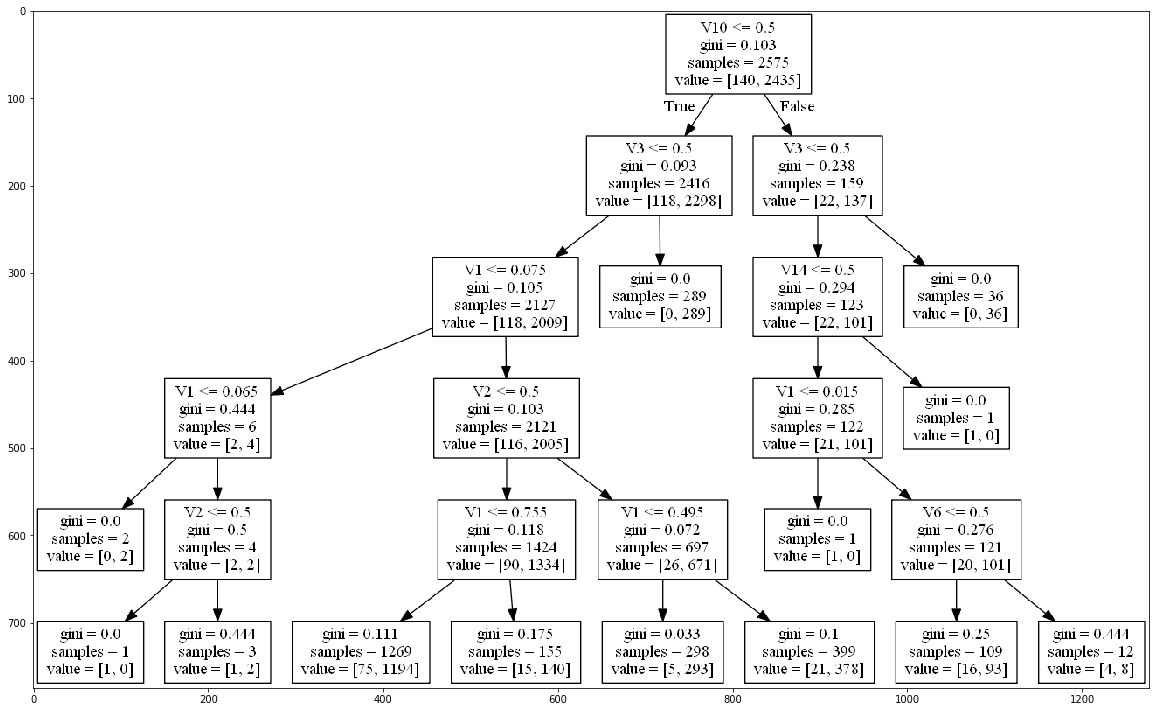

In [0]:
show_tree(dt, features, 'dec_tree_01.png')

Now we can use the predicted values from the decision tree cassifier to calculate the accuracy of the model

In [0]:
y_pred = C.predict(X_test)

In [0]:
accuracy_score(y_pred, Y_test)

0.9538043478260869

In [0]:
print('Classification report:')
print(metrics.classification_report(Y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        51
         1.0       0.95      1.00      0.98      1053

    accuracy                           0.95      1104
   macro avg       0.48      0.50      0.49      1104
weighted avg       0.91      0.95      0.93      1104



Confusion matrix:
Predicted  0.0  1.0  __all__
Actual                      
0.0          0    9        9
1.0          0  338      338
__all__      0  347      347
Stats:
Confusion Matrix:

Predicted  0.0  1.0  __all__
Actual                      
0.0          0    9        9
1.0          0  338      338
__all__      0  347      347


Overall Statistics:

Accuracy: 0.9740634005763689
95% CI: (0.9513368082405385, 0.9880730446109114)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      0.0        1.0
Population                                   347        347
P: Condition positive                          9        338
N: Condition negative                        338          9
Test outcome positive                          0        347
Test outcome negative                        347          0
TP: True Positive                              0        338
TN: True Negative                

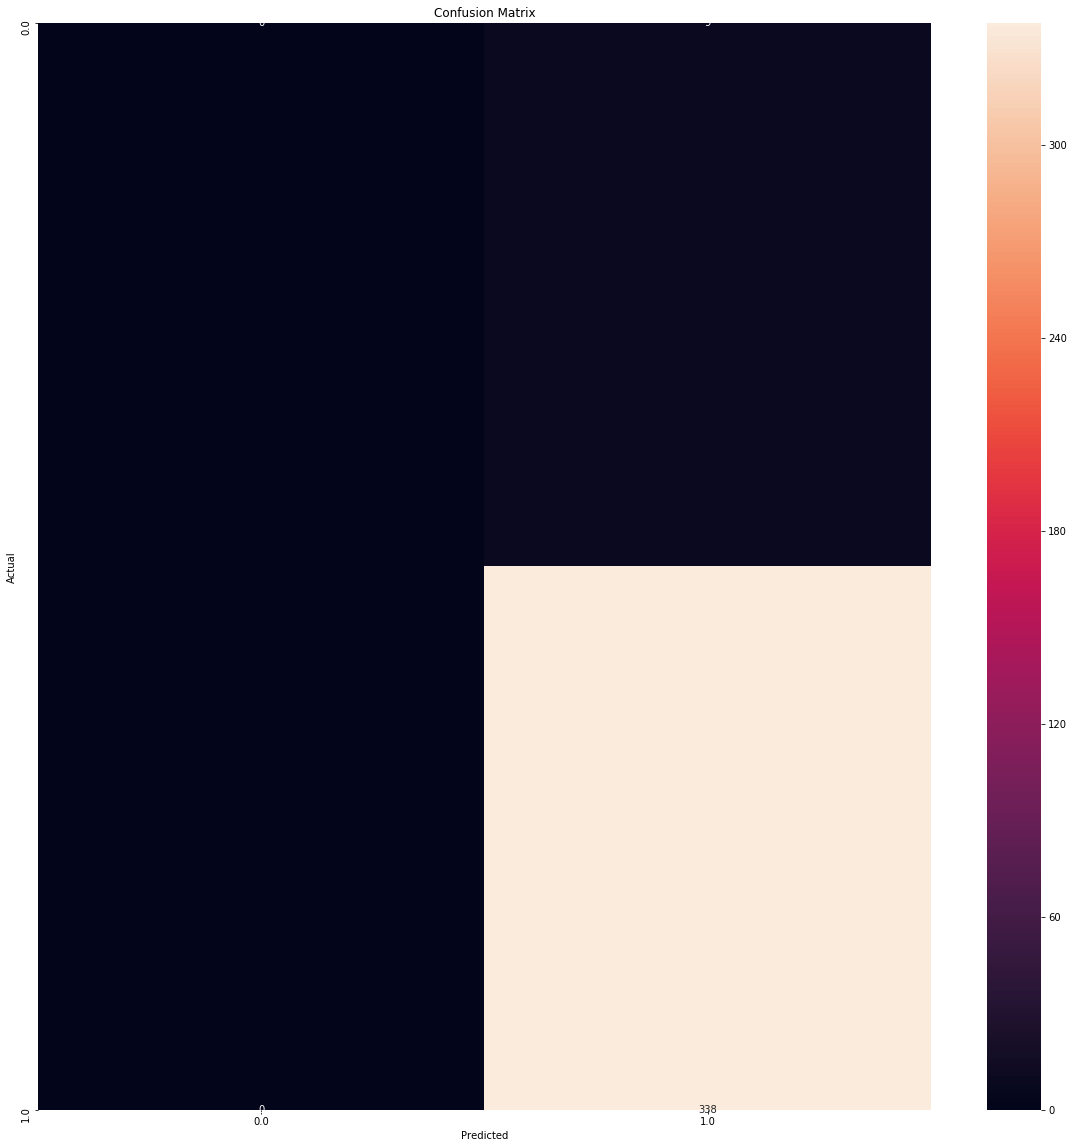

<Figure size 1440x1440 with 0 Axes>

In [0]:
print('Confusion matrix:')
cm = ConfusionMatrix(Y_test, y_pred)
print(cm)
print('Stats:')
cm.print_stats()
ax = cm.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Confusion Matrix')
plt.show()
plt.clf()

To have an idea about the data imbalance, we can calculate the balanced error rate, either by using the direct specified command or we can calculate the same by using FPR+FNR/2

In [0]:
print("Balanced Error Rate = ")
1-balanced_accuracy_score(Y_test, y_pred)

Balanced Error Rate = 


0.5

Now, before moving further, we can utilize the weights, to take care of the imbalanced data

In [0]:
C = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5)

In [0]:
dt = C.fit(X_train, Y_train)

In [0]:
features = df.columns[0:len(df.columns)-1]
features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15'],
      dtype='object')

In [0]:
def show_tree(tr, features, path):
    f = StringIO()
    tree.export_graphviz(tr, out_file=f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

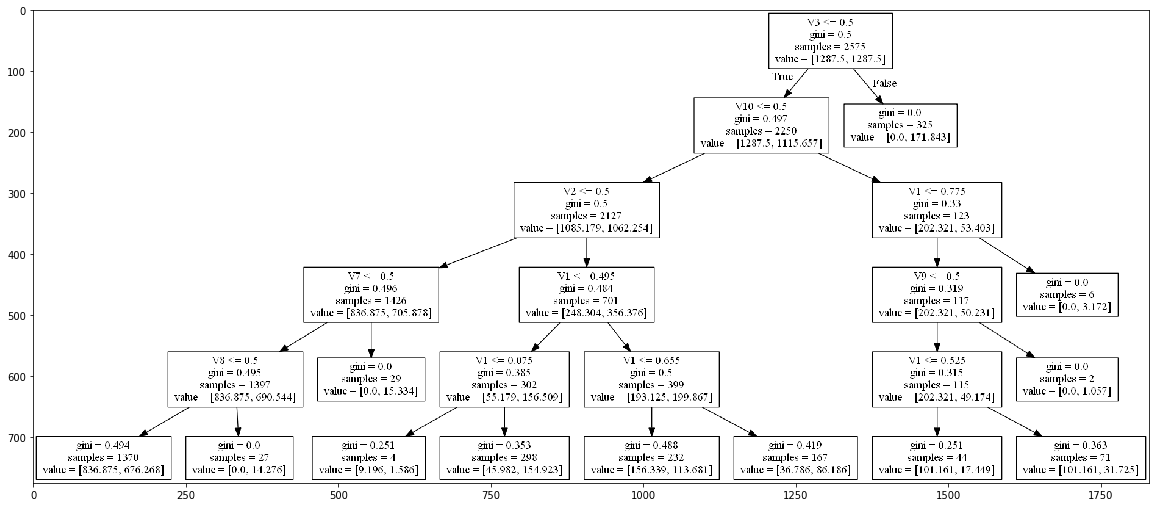

In [0]:
show_tree(dt, features, 'dec_tree_01.png')

The accuracy can be calculated for this case when we have used the weights.

In [0]:
y_pred = C.predict(X_test)

In [0]:
accuracy_score(y_pred, Y_test)

0.35507246376811596

In [0]:
print('Classification report:')
print(metrics.classification_report(Y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.06      0.84      0.11        51
         1.0       0.98      0.33      0.50      1053

    accuracy                           0.36      1104
   macro avg       0.52      0.59      0.30      1104
weighted avg       0.94      0.36      0.48      1104



Confusion matrix:
Predicted  False  True  __all__
Actual                         
False          6     3        9
True         222   116      338
__all__      228   119      347
Stats:
population: 347
P: 338
N: 9
PositiveTest: 119
NegativeTest: 228
TP: 116
TN: 6
FP: 3
FN: 222
TPR: 0.3431952662721893
TNR: 0.6666666666666666
PPV: 0.9747899159663865
NPV: 0.02631578947368421
FPR: 0.3333333333333333
FDR: 0.025210084033613446
FNR: 0.6568047337278107
ACC: 0.3515850144092219
F1_score: 0.5076586433260394
MCC: 0.0033021800223649476
informedness: 0.009861932938855844
markedness: 0.0011057054400707145
prevalence: 0.9740634005763689
LRP: 1.029585798816568
LRN: 0.985207100591716
DOR: 1.045045045045045
FOR: 0.9736842105263158


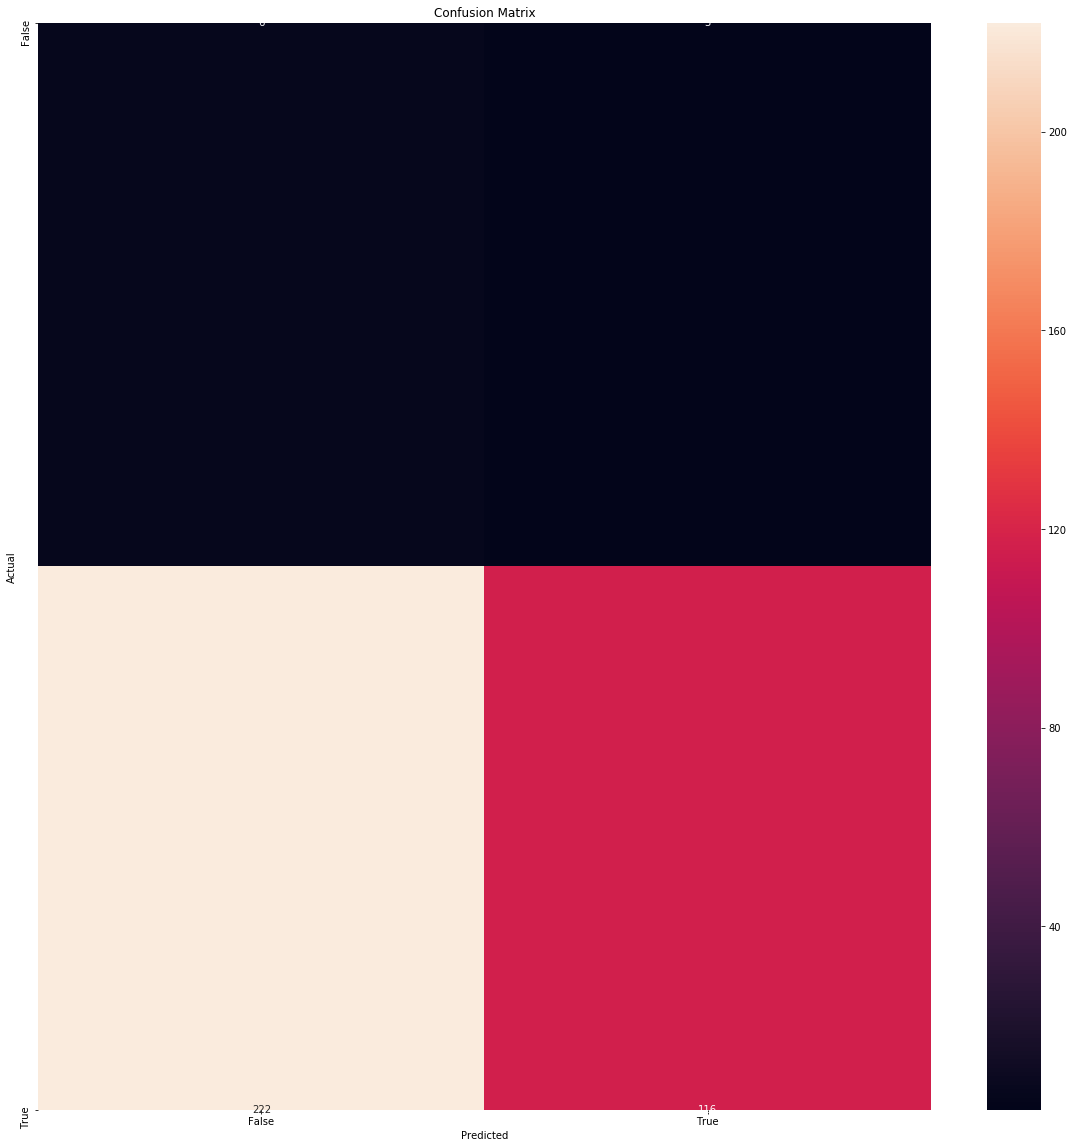

<Figure size 1440x1440 with 0 Axes>

In [0]:
print('Confusion matrix:')
cm = ConfusionMatrix(Y_test, y_pred)
print(cm)
print('Stats:')
cm.print_stats()
ax = cm.plot(backend='seaborn', annot=True, fmt='g')
ax.set_title('Confusion Matrix')
plt.show()
plt.clf()

Balanced Error Rate is calculated again for the updated case

In [0]:
print("Balanced Error Rate = ")
1-balanced_accuracy_score(Y_test, y_pred)

Balanced Error Rate = 


0.4127143734986872

Comments:

Since we have taken care of the imbalanced data, the accuracy was supposed to decrease as expected